In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I.
Read the Data from UCI Machine Learning Repository and Print the table with few rows and columns

In [ ]:
electric_power_consumption = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',
                 parse_dates={'Date_Time' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'])
electric_power_consumption.info()

<ipython-input-5-be0b6fa8d119>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  electric_power_consumption = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',
<ipython-input-5-be0b6fa8d119>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  electric_power_consumption = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date_Time              datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [ ]:
electric_power_consumption.shape

(2075259, 8)

In [ ]:
electric_power_consumption.describe()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [ ]:
electric_power_consumption.isnull().sum()

Date_Time                    0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
# Fill missing values with column means
electric_power_consumption.fillna(electric_power_consumption.mean(), inplace=True)

# Set the index to the datetime column
electric_power_consumption.set_index('Date_Time', inplace=True)

# Resample the data into hourly intervals and aggregate using mean
hourly_data = electric_power_consumption.resample('H').mean()

# Check for missing values after resampling
print(hourly_data.isnull().sum())
hourly_data

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


In [ ]:
data1=hourly_data.loc[:,['Global_active_power']]
#data1.set_index('Date_Time',inplace=True)
data1

,Global_active_power
Date_Time,
2006-12-16 17:00:00,4.222889
2006-12-16 18:00:00,3.632200
2006-12-16 19:00:00,3.400233
2006-12-16 20:00:00,3.268567
2006-12-16 21:00:00,3.056467
...,...
2010-11-26 17:00:00,1.725900
2010-11-26 18:00:00,1.573467
2010-11-26 19:00:00,1.659333


Exploratory Data Analysis

Setting the Date_time column as Index Column

Model Preparation

In [ ]:
# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import mean squared error and mean absolute error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping

from keras.utils import set_random_seed, plot_model

Transforming, Splitting, Reshaping the data

In [ ]:
# Filter data for the year 2010
#filtered_one_day_data = data1

#Transform the Global_active_power column of the data DataFrame into a numpy array of float values

dataset = data1.Global_active_power.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (90%) and a test set (10%)

train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
data1

,Global_active_power
Date_Time,
2006-12-16 17:00:00,4.222889
2006-12-16 18:00:00,3.632200
2006-12-16 19:00:00,3.400233
2006-12-16 20:00:00,3.268567
2006-12-16 21:00:00,3.056467
...,...
2010-11-26 17:00:00,1.725900
2010-11-26 18:00:00,1.573467
2010-11-26 19:00:00,1.659333


In [ ]:
dataset

array([[0.6368162 ],
       [0.5450449 ],
       [0.50900584],
       ...,
       [0.23853418],
       [0.16153105],
       [0.12594771]], dtype=float32)

In [ ]:
dataset.shape

(34589, 1)

In [ ]:
train

array([[0.6368162 ],
       [0.5450449 ],
       [0.50900584],
       ...,
       [0.1703246 ],
       [0.0282243 ],
       [0.03004205]], dtype=float32)

In [ ]:
train.shape

(31130, 1)

In [ ]:
test

array([[0.13320318],
       [0.18312652],
       [0.27145565],
       ...,
       [0.23853418],
       [0.16153105],
       [0.12594771]], dtype=float32)

In [ ]:
test.shape

(3459, 1)

In [ ]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [ ]:
X_train

array([[0.6368162 , 0.5450449 , 0.50900584, ..., 0.5029881 , 0.453158  ,
        0.2165762 ],
       [0.5450449 , 0.50900584, 0.48854968, ..., 0.453158  , 0.2165762 ,
        0.04874259],
       [0.50900584, 0.48854968, 0.4555972 , ..., 0.2165762 , 0.04874259,
        0.02367217],
       ...,
       [0.17248414, 0.22212265, 0.17148463, ..., 0.07453287, 0.07232671,
        0.17819633],
       [0.22212265, 0.17148463, 0.02686746, ..., 0.07232671, 0.17819633,
        0.20976612],
       [0.17148463, 0.02686746, 0.04110909, ..., 0.17819633, 0.20976612,
        0.1703246 ]], dtype=float32)

In [ ]:
X_train.shape

(31099, 30)

In [ ]:
X_test

array([[0.13320318, 0.18312652, 0.27145565, ..., 0.02920827, 0.05376083,
        0.04023905],
       [0.18312652, 0.27145565, 0.24620393, ..., 0.05376083, 0.04023905,
        0.08636636],
       [0.27145565, 0.24620393, 0.22086424, ..., 0.04023905, 0.08636636,
        0.02951382],
       ...,
       [0.05837511, 0.03608049, 0.02744749, ..., 0.1169004 , 0.14665243,
        0.24887621],
       [0.03608049, 0.02744749, 0.0324709 , ..., 0.14665243, 0.24887621,
        0.22519368],
       [0.02744749, 0.0324709 , 0.06491072, ..., 0.24887621, 0.22519368,
        0.23853418]], dtype=float32)

In [ ]:
X_test.shape

(3428, 30)

In [ ]:
Y_train

array([0.04874259, 0.02367217, 0.02941024, ..., 0.20976612, 0.1703246 ,
       0.0282243 ], dtype=float32)

In [ ]:
Y_train.shape

(31099,)

In [ ]:
Y_test

array([0.08636636, 0.02951382, 0.04036852, ..., 0.22519368, 0.23853418,
       0.16153105], dtype=float32)

In [ ]:
Y_test.shape

(3428,)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape[1]

1

In [ ]:
X_test.shape[1]

1

In [ ]:
look_back

30

LSTM (Long Short Term Memory) Model

In [ ]:
# Defining the LSTM model
model = Sequential()

# Adding the first layer with 100 LSTM units and input shape of the data
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Adding a dense layer with 1 unit to make predictions
model.add(Dense(1))

# Compiling the model with mean squared error as the loss function and using Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')



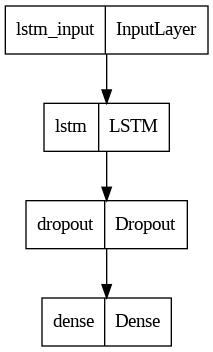

In [ ]:
# Plot the model
plot_model(model, to_file='lstm_model.png')

In [ ]:
# Fitting the model on training data and using early stopping to avoid overfitting
history = model.fit(X_train, Y_train, epochs=50, batch_size=1240, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Displaying a summary of the model
model.summary()

Epoch 1/50
26/26 [==============================] - 4s 41ms/step - loss: 0.0223 - val_loss: 0.0092
Epoch 2/50
26/26 [==============================] - 1s 20ms/step - loss: 0.0144 - val_loss: 0.0078
Epoch 3/50
26/26 [==============================] - 1s 20ms/step - loss: 0.0124 - val_loss: 0.0071
Epoch 4/50
26/26 [==============================] - 1s 21ms/step - loss: 0.0114 - val_loss: 0.0067
Epoch 5/50
26/26 [==============================] - 1s 19ms/step - loss: 0.0108 - val_loss: 0.0064
Epoch 6/50
26/26 [==============================] - 1s 20ms/step - loss: 0.0103 - val_loss: 0.0062
Epoch 7/50
26/26 [==============================] - 0s 19ms/step - loss: 0.0098 - val_loss: 0.0061
Epoch 8/50
26/26 [==============================] - 1s 20ms/step - loss: 0.0096 - val_loss: 0.0059
Epoch 9/50
26/26 [==============================] - 1s 19ms/step - loss: 0.0094 - val_loss: 0.0058
Epoch 10/50
26/26 [==============================] - 0s 19ms/step - loss: 0.0093 - val_loss: 0.0058
Epoch 11/

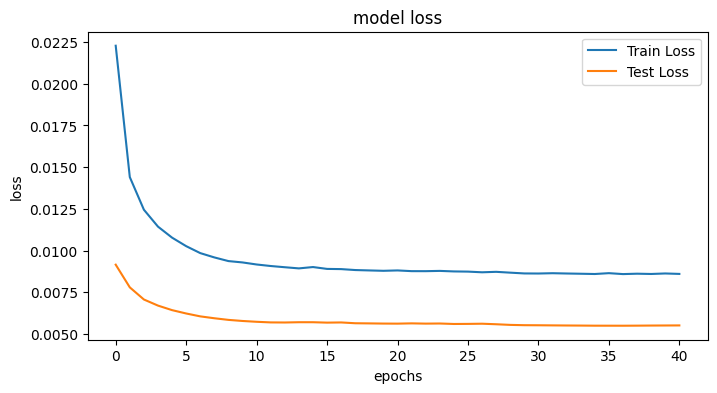

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.xticks(range(0,21))
plt.legend(loc='upper right')
plt.show()

In [ ]:
Y_test.shape

(1, 3428)

In [ ]:
test_predict.shape

(3428, 1)

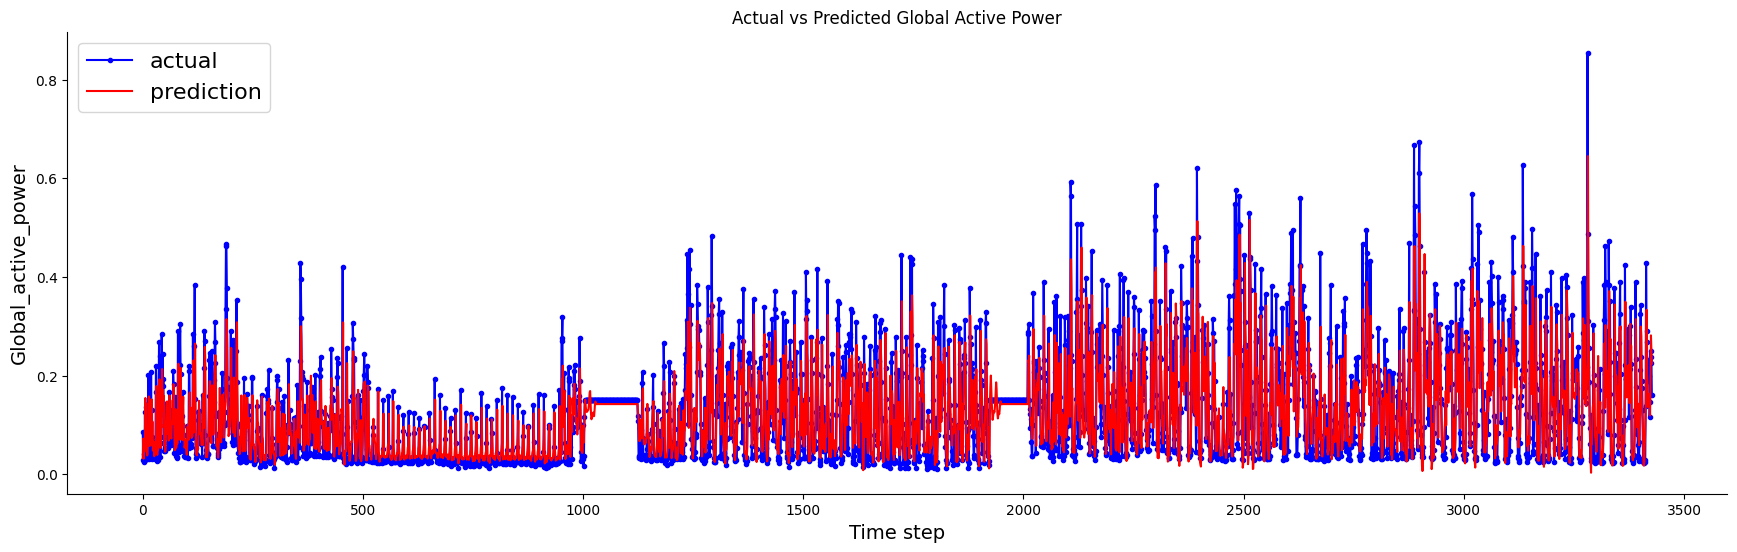

In [ ]:
aa=[x for x in range(3428)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

plt.title("Actual vs Predicted Global Active Power")

# Plotting the actual values in purple with a dot marker
plt.plot(aa, Y_test[0][:3428], marker='.', label="actual", color='blue')

# Plotting the predicted values in red with a solid line
plt.plot(aa, test_predict[:,0][:3428], '-', label="prediction", color='red')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [ ]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# invert predictions
'''train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])'''
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

'''print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))'''
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Exception ignored in: <function _xla_gc_callback at 0x7b1a4c01e9e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


108/108 [==============================] - 0s 2ms/step
Test Mean Absolute Error: 0.049704873226930756
Test Root Mean Squared Error: 0.07425174704516607
